In [146]:
import matplotlib.pylab as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from scipy import interpolate
%matplotlib notebook

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

names = np.array(['SF0','AWP2', 'GIPSF', 'SCLBL'])
labels = np.array(['No SF','AWP2', 'GIPSF', 'SCLBL'])
colors = np.array(['black','darkblue','red','darkorange'])
colors2 = np.array(['black','deepskyblue','salmon','#ffcc99'])
shape = np.array(['s','^','o','d'])
line_thickness = np.array([4.8, 2.7,2.2,3.2])
dashes = np.array([[2,1e-15],[4,8],[20,3],[9,6]])
order = np.array([1,4,2,3])

def plot_style(xticks=5,yticks=5):
    
    global ax
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5

    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6


<IPython.core.display.Javascript object>


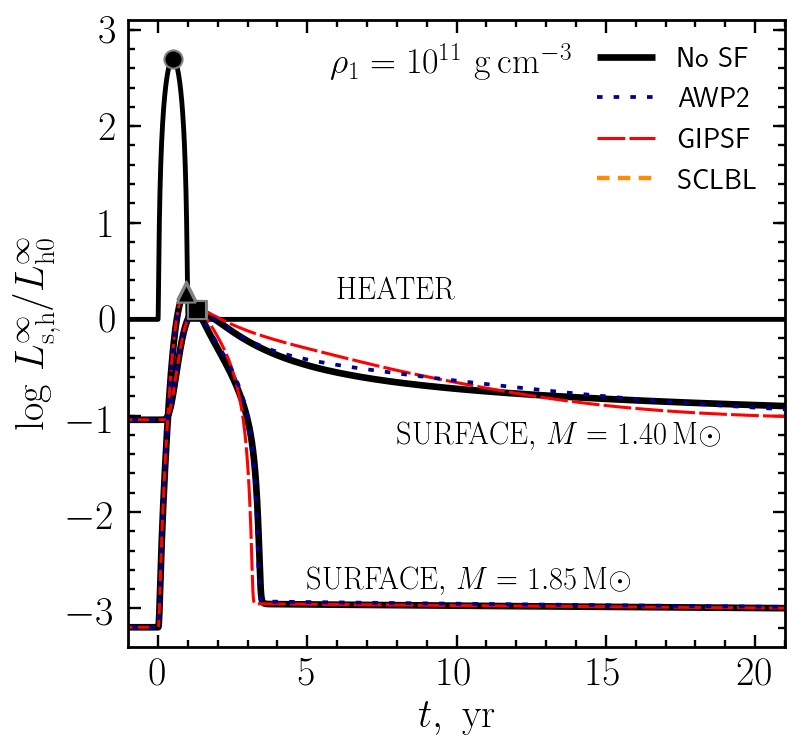

()
3998


/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10


In [191]:

def show_curves_1(Pow=4, dt=0, timeshift=4e4):

    plot_style()

    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5
    plt.rcParams.update({'figure.autolayout': True})
    zorders = np.array([2,1,1,1]) + 5
    zorders2 = np.array([4,3,3,3]) + 5

    for rho in range(1,2):
        num = dt + 8*Pow + 2*rho
        for i in range(0,3):
            idx = i
            data = np.loadtxt('output_lm/cooling_' + names[i] + '_' + str(num) + '.dat')
            data2 = np.loadtxt('output_hm/cooling_' + names[i] + '_' + str(num) + '.dat')

            max_arg = 4000 + np.argmax(data[4000:, -2])
            max_arg2 = 4000 + np.argmax(data2[4000:, -2])

            power_ref = data[4000,3]
            power_ref2 = data2[4000,3]
            
            if i==0:
                times = data[:,1].copy()-timeshift
                times2 = data2[:,1].copy()-timeshift
                indx1 = 3998
                indx2 = np.argmin(np.abs(times-50))
                indx3 = np.argmin(np.abs(times2-50))
                print(np.shape(indx2-indx1))
                print(indx1)
                data_output = np.zeros((5,int((indx2-indx1)/2)+1))
                data_output[0,:] = times[indx1:indx2+1][::2]
                data_output2 = np.zeros((4,int((indx3-indx1)/5)+1))
                data_output2[0,:] = times2[indx1:indx3+1][::5]
                
            plt.plot(data[:,1]-timeshift, np.log10(data[:,-2]/power_ref), color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx])
            plt.scatter(data[max_arg,1]-timeshift, np.log10(data[max_arg, -2]/power_ref), marker=shape[0], s=170,
                        facecolor=colors[i], edgecolor='grey',linewidth=1.5, zorder=zorders2[i])
            plt.plot(data2[:,1]-timeshift, np.log10(data2[:,-2]/power_ref2), color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx])
            plt.scatter(data2[max_arg2,1]-timeshift, np.log10(data2[max_arg2, -2]/power_ref2), marker=shape[1], s=170,
                        facecolor=colors[i], edgecolor='grey',linewidth=1.5, zorder=zorders2[i])
            
            data_output[2+i,:] = np.log10(data[:,-2]/power_ref)[indx1:indx2+1][::2]
            data_output2[1+i,:] = np.log10(data2[:,-2]/power_ref2)[indx1:indx3+1][::5]
                
            if i==0:

                max_arg = 4000 + np.argmax(data[4000:, 3])
                plt.plot(data[:,1]-timeshift, np.log10(data[:,3]/power_ref), color=colors[i], lw=3.5)
                plt.scatter(data[max_arg,1]-timeshift, np.log10(data[max_arg, 3]/power_ref), marker=shape[2], s=170,
                        facecolor=colors[i], edgecolor='grey',linewidth=1.5, zorder=zorders2[i])
                data_output[1,:] = np.log10(data[:,3]/power_ref)[indx1:indx2+1][::2]
                plt.plot([-10,-20], [-10,-20], color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx],label=labels[idx])
                idx += 1
                plt.plot([-10,-20], [-10,-20], color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx],label=labels[idx])
                idx += 1
                plt.plot([-10,-20], [-10,-20], color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx],label=labels[idx])
                idx += 1
                plt.plot([-10,-20], [-10,-20], color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx],label=labels[idx])

        plt.legend(loc='upper right', fontsize=21, frameon=False)

        plt.xticks(np.linspace(0,35,8),fontsize=29)
        plt.yticks(np.linspace(-4,3,8),fontsize=29)
        plt.ylim(-3.4, 3.1)
        plt.xlim(-1,21)
        plt.ylabel('$\\rm log$ $L^{\infty}_{\\rm{s,h}}/L_{\\rm{h0}}^{\infty}$', fontsize=29)
        plt.xlabel('$t, \\thinspace \\thinspace \\rm{yr}$', fontsize=29)
        np.savetxt('fig1M140.dat',data_output.T,fmt='%1.5e')
        np.savetxt('fig1N185.dat',data_output2.T,fmt='%1.5e')
        plt.text(6,0.2,'$\\rm HEATER$',fontsize=22)
        #plt.text(6,1.5,'$\\rm H_{0} = 5\\times 10^{2} H_{c} $',fontsize=22)
        plt.text(5.8,2.5,'$\\rm \\rho_{1} = 10^{11} \\thinspace \\thinspace g \\thinspace cm^{-3}$',fontsize=26)
        plt.text(8,-1.3,'$\\rm SURFACE,$ $M = 1.40 \\thinspace \\rm M \odot$',fontsize=22)
        plt.text(5,-2.8,'$\\rm SURFACE,$ $M = 1.85 \\thinspace \\rm M \odot$',fontsize=22)

        #plt.savefig('fig1.eps',format='eps')
        plt.show()

def show_curves_2(Pow=4, dt=0, timeshift=4e4):
    plot_style(xticks=5,yticks=5)

    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5
    plt.rcParams.update({'figure.autolayout': True})
    zorders = np.array([2,1,1,1])
    zorders2 = np.array([4,3,3,3])
    for rho in range(2,3):
        num = dt + 8*Pow + 2*rho
        for i in range(0,3):

            idx = i
            data = np.loadtxt('output_lm/cooling_' + names[i] + '_' + str(num) + '.dat')
            data2 = np.loadtxt('output_hm/cooling_' + names[i] + '_' + str(num) + '.dat')

            max_arg = 4000 + np.argmax(data[4000:, -2])
            max_arg2 = 4000 + np.argmax(data2[4000:, -2])

            power_ref = data[4000,3]
            power_ref2 = data2[4000,3]

            ax2 = plt.subplot(3,1,2)

            x_minor_locator = AutoMinorLocator(5)
            y_minor_locator = AutoMinorLocator(5)
            plt.tick_params(which='both', width=1.7)
            plt.tick_params(which='major', length=9)
            plt.tick_params(which='minor', length=5)

            plt.xlim(-1,21)
            plt.yticks(np.linspace(-1,-0.5,2),fontsize=29)
            plt.ylim(-1.1,-0.4)
            ax2.xaxis.set_minor_locator(x_minor_locator)
            ax2.yaxis.set_minor_locator(y_minor_locator)
            ax2.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')
        
                
            plt.plot(data[:,1]-timeshift, np.log10(data[:,-2]/power_ref), color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx])
            plt.scatter(data[max_arg,1]-timeshift, np.log10(data[max_arg, -2]/power_ref), marker=shape[0], s=170,
                        facecolor=colors[i], edgecolor='grey',linewidth=1.5, zorder=order[idx]+1)

            ax3 = plt.subplot(3,1,3)
            x_minor_locator = AutoMinorLocator(5)
            y_minor_locator = AutoMinorLocator(5)
            plt.tick_params(which='both', width=1.7)
            plt.tick_params(which='major', length=9)
            plt.tick_params(which='minor', length=5)

            plt.xlim(-1,21)
            plt.yticks(np.linspace(-3.,-1,3),fontsize=29)
            plt.ylim(-3.3,-0.5)

            ax3.xaxis.set_minor_locator(x_minor_locator)
            ax3.yaxis.set_minor_locator(y_minor_locator)
            ax3.tick_params(axis='both', which='major', pad=8)
            ax3.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')
            plt.plot(data2[:,1]-timeshift, np.log10(data2[:,-2]/power_ref2), color=colors[idx],
                     linewidth=line_thickness[idx], dashes = (dashes[idx,0],dashes[idx,1]),zorder=order[idx])
            plt.scatter(data2[max_arg2,1]-timeshift, np.log10(data2[max_arg2, -2]/power_ref2), marker=shape[1], s=170,
                        facecolor=colors[i], edgecolor='grey',linewidth=1.5, zorder=order[idx]+1)

            if i==0:

                ax1 = plt.subplot(3,1,1)

                x_minor_locator = AutoMinorLocator(5)
                y_minor_locator = AutoMinorLocator(5)
                plt.tick_params(which='both', width=1.7)
                plt.tick_params(which='major', length=9)
                plt.tick_params(which='minor', length=5)
                plt.yticks(np.linspace(0,3,4),fontsize=29)
                plt.ylim(-0.1,3.1)
                plt.xlim(-1,21)

                ax1.xaxis.set_minor_locator(x_minor_locator)
                ax1.yaxis.set_minor_locator(y_minor_locator)
                ax1.tick_params(axis='both', which='major', pad=8)
                ax1.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')
                max_arg = 4000 + np.argmax(data[4000:, 3])

                plt.plot(data[:,1]-timeshift, np.log10(data[:,3]/power_ref), color=colors[i], lw=3.5)
                plt.scatter(data[max_arg,1]-timeshift, np.log10(data[max_arg, 3]/power_ref), marker=shape[2], s=170,
                        facecolor=colors[i], edgecolor='grey',linewidth=1.5, zorder=zorders2[i])

        plt.xticks(np.linspace(-0,35,8),fontsize=29)
        plt.xlim(-1,21)

        plt.setp(ax2.get_xticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)

        plt.ylabel('$\\rm log $ $L^{\infty}_{\\rm{s}}/L_{\\rm{h0}}^{\infty}$', fontsize=29, labelpad=24)
        plt.xlabel('$t, \\thinspace \\thinspace \\rm{yr}$', fontsize=29)

        plt.subplot(3,1,1)

        plt.text(2,0.4,'$\\rm Heater$',fontsize=26)
        plt.text(12,2.16,'$\\rm \\rho_{1} = 10^{12} \\thinspace \\thinspace g \\thinspace cm^{-3}$',fontsize=26)
        plt.ylabel('$\\rm log $ $L^{\infty}_{\\rm{h}}/L_{\\rm{h0}}^{\infty}$', fontsize=29, labelpad=49)

        plt.subplot(3,1,2)
        plt.text(8,-0.55,'$\\rm Surface,$ $M = 1.40 \\thinspace \\rm M \odot$',fontsize=26)
        plt.ylabel('$\\rm log $ $L^{\infty}_{\\rm{s}}/L_{\\rm{h0}}^{\infty}$', fontsize=29)

        plt.subplot(3,1,3)
        plt.text(8,-1.1,'$\\rm Surface,$ $M = 1.85 \\thinspace \\rm M \odot$',fontsize=26)

        plt.savefig('fig2.eps',format='eps')
        plt.show()
 
show_curves_1()       

<IPython.core.display.Javascript object>


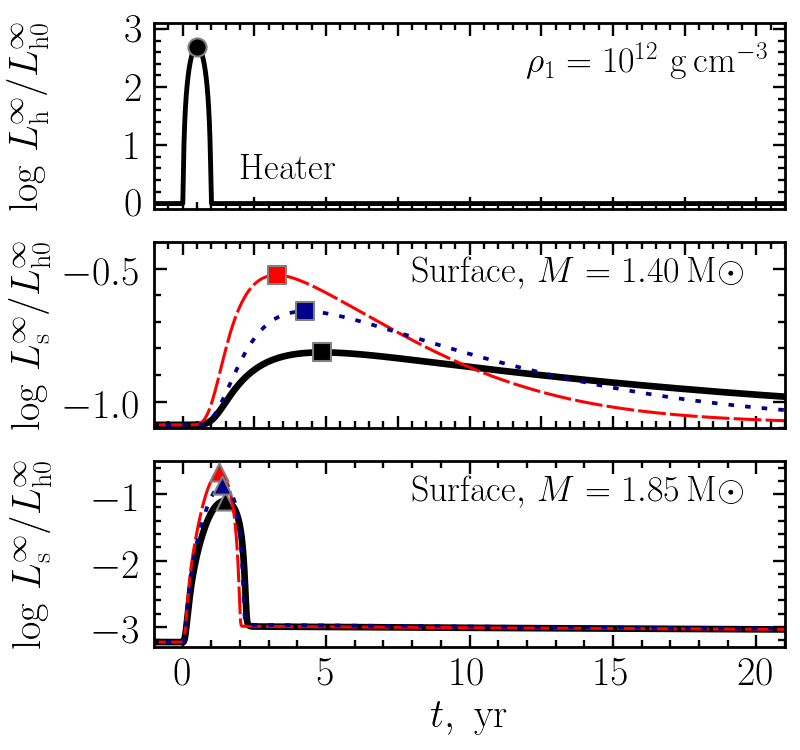

/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: RuntimeWarning: divide by zero encountered in log10


In [148]:
show_curves_2()

<IPython.core.display.Javascript object>


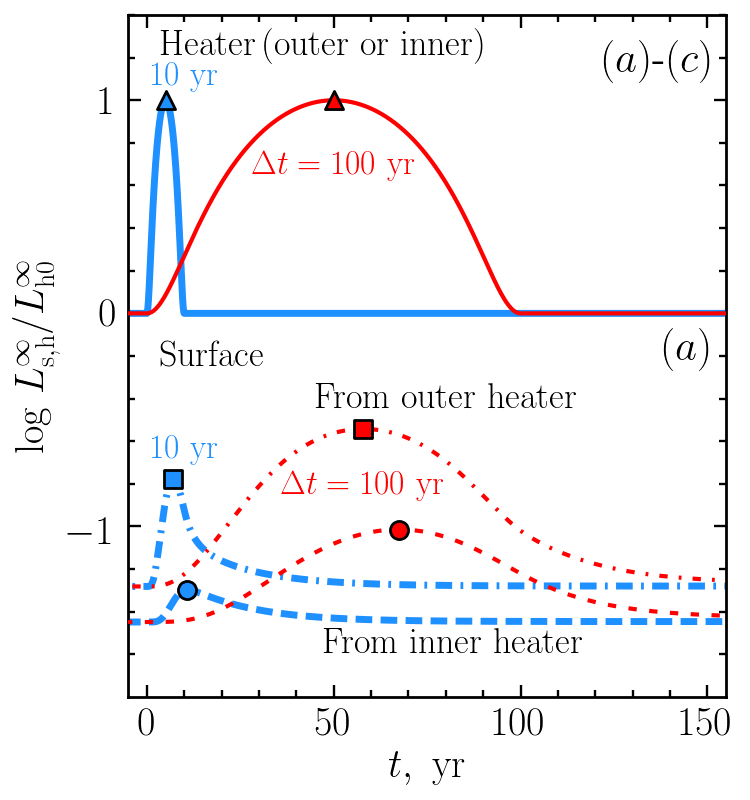

0
1


/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [40]:
colors3 = np.array(['dodgerblue','red'])
line_thickness3 = np.array([5, 3.])
dashes3 = np.array([[[12,6,2,6],[6,8,2,8]],[[12,6,12,6],[6,9,6,9]]])
shape3 = ['s','o']

def show_curves_1_old(Pow=4, dt=0, timeshift=3e4):

    plot_style()

    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5
    plt.rcParams.update({'figure.autolayout': True})
    zorders = np.array([2,1,1,1]) + 5
    zorders2 = np.array([4,3,3,3]) + 5

    for rho in range(0,2):
        for i in range(0,2):
            num = 45 + rho + 6*i
            idx = i
            data = np.loadtxt('output/cooling_SF0_' + str(num) + '.dat')

            max_arg = 4000 + np.argmax(data[4000:, -2])
            power_ref = data[10,3]

            plt.plot(data[:,1]-timeshift, 0.1 - 0.03*rho + np.log10(data[:,-2]/power_ref), color=colors3[idx],
                     linewidth=line_thickness3[idx], dashes = (dashes3[rho,idx,0],dashes3[rho,idx,1],dashes3[rho,idx,2],dashes3[rho,idx,3]),zorder=order[idx])
            plt.scatter(data[max_arg,1]-timeshift, 0.1 - 0.03*rho + np.log10(data[max_arg, -2]/power_ref), marker=shape3[rho], s=170,
                        facecolor=colors3[i], edgecolor='black',linewidth=2, zorder=zorders2[i])
        
            if rho==0:
                print(i)
                max_arg = np.argmax(data[:, 3])

                plt.plot(data[:,1]-timeshift, np.log10(data[:,3]/power_ref), color=colors3[idx],
                    linewidth=line_thickness3[idx],zorder=order[idx])
                plt.scatter(data[max_arg,1]-timeshift, np.log10(data[max_arg, 3]/power_ref), marker='^', s=170,
                    facecolor=colors3[i], edgecolor='black',linewidth=2, zorder=zorders2[i])
            
    plt.legend(loc='upper right', fontsize=21, frameon=False)

    plt.xticks([0,50,100,150],fontsize=29)
    plt.yticks([-1,0,1],fontsize=29)
    plt.ylim(-1.8, 1.4)
    plt.xlim(-5,155)
    plt.ylabel('$\\rm log$ $L^{\infty}_{\\rm{s,h}}/L_{\\rm{h0}}^{\infty}$', fontsize=29)
    plt.xlabel('$t, \\thinspace \\thinspace \\rm{yr}$', fontsize=29)

    plt.text(3.4,1.21,'$\\rm Heater \\thinspace (outer \\thinspace \\thinspace or  \\thinspace  \\thinspace inner)$',fontsize=26)
    plt.text(1.,1.07, '$\\rm 10 \\thinspace \\thinspace yr$',color=colors3[0],fontsize=24)
    plt.text(28.,0.65, '$\Delta t = \\rm 100 \\thinspace \\thinspace yr$',color=colors3[1],fontsize=24)
    
    plt.text(1.,-0.68, '$\\rm 10 \\thinspace \\thinspace yr$',color=colors3[0],fontsize=24)
    plt.text(36.,-0.85, '$\Delta t = \\rm 100 \\thinspace \\thinspace yr$',color=colors3[1],fontsize=24)
    plt.text(45,-0.45,'$\\rm From \\thinspace \\thinspace outer \\thinspace \\thinspace heater$',fontsize=26)
    plt.text(47,-1.6,'$\\rm From \\thinspace \\thinspace inner \\thinspace \\thinspace heater$',fontsize=26)
    plt.text(3.4,-0.25,'$\\rm Surface$',fontsize=26)
    
    plt.text(122,1.13,'$(a)$-$(c)$',fontsize=31) 
    plt.text(138,-0.22,'$(a)$',fontsize=31) 
    plt.savefig('fig1A.eps',format='eps')
    plt.show()
show_curves_1_old()

<IPython.core.display.Javascript object>


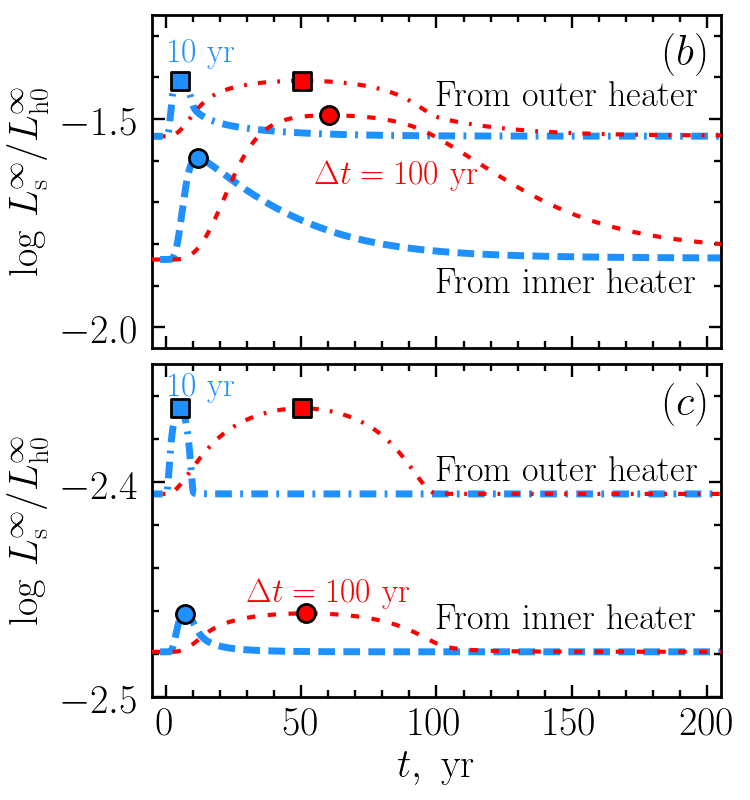

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [131]:
def show_curves_2_old(Pow=4, dt=0, timeshift=3e4):

    
    timeshift=3e3
    plot_style(xticks=5,yticks=5)

    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5
    plt.rcParams.update({'figure.autolayout': True})

    zorders = np.array([2,1,1,1]) + 5
    zorders2 = np.array([4,3,3,3]) + 5
    
    ax1 = plt.subplot(2,1,1)

    x_minor_locator = AutoMinorLocator(5)
    y_minor_locator = AutoMinorLocator(5)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)

    plt.xlim(-1,21)
    plt.yticks(np.linspace(-1,-0.5,2),fontsize=29)
    plt.ylim(-1.1,-0.4)
    ax1.xaxis.set_minor_locator(x_minor_locator)
    ax1.yaxis.set_minor_locator(y_minor_locator)
    ax1.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')
    
    for rho in range(0,2):
        for i in range(0,2):
            num = 45 + rho + 6*i + 2
            idx = i
            data = np.loadtxt('output/cooling_SF0_' + str(num) + '.dat')

            max_arg = 4000 + np.argmax(data[4000:, -2])
            power_ref = data[10,3]

            plt.plot(data[:,1]-timeshift, -0.09 -0.01*rho + np.log10(data[:,-2]/power_ref), color=colors3[idx],
                     linewidth=line_thickness3[idx], dashes = (dashes3[rho,idx,0],dashes3[rho,idx,1],dashes3[rho,idx,2],dashes3[rho,idx,3]),zorder=order[idx])
            plt.scatter(data[max_arg,1]-timeshift, -0.09 -0.01*rho  + np.log10(data[max_arg, -2]/power_ref), marker=shape3[rho], s=170,
                        facecolor=colors3[i], edgecolor='black',linewidth=2, zorder=zorders2[i])
        
    plt.setp(ax1.get_xticklabels(), visible=False)        
    plt.legend(loc='upper right', fontsize=21, frameon=False)

    plt.xticks([0,50,100,150,200],fontsize=29)
    plt.yticks([-2,-1.5],fontsize=29)
    plt.ylim(-2.05, -1.25)
    plt.xlim(-5,205)
    plt.ylabel('$\\rm log$ $L^{\infty}_{\\rm{s}}/L_{\\rm{h0}}^{\infty}$', fontsize=29)

    
    plt.text(1.,-1.365, '$\\rm 10 \\thinspace \\thinspace yr$',color=colors3[0],fontsize=24)
    plt.text(55.,-1.658, '$\Delta t = \\rm 100 \\thinspace \\thinspace yr$',color=colors3[1],fontsize=24)
    plt.text(100,-1.47,'$\\rm From \\thinspace \\thinspace outer \\thinspace \\thinspace heater$',fontsize=26)
    plt.text(100,-1.92,'$\\rm From \\thinspace \\thinspace inner \\thinspace \\thinspace heater$',fontsize=26)
    plt.text(184,-1.37,'$(b)$',fontsize=31) 
    
    
    ax2 = plt.subplot(2,1,2)

    x_minor_locator2 = AutoMinorLocator(5)
    y_minor_locator2 = AutoMinorLocator(5)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)

    plt.xlim(-1,21)
    plt.yticks(np.linspace(-1,-0.5,2),fontsize=29)
    plt.ylim(-1.1,-0.4)
    ax2.xaxis.set_minor_locator(x_minor_locator2)
    ax2.yaxis.set_minor_locator(y_minor_locator2)
    ax2.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')
  
    timeshift=3e3
    
    for rho in range(0,2):
        for i in range(0,2):
            num = 45 + rho + 6*i + 4
            idx = i
            data = np.loadtxt('output/cooling_SF0_' + str(num) + '.dat')

            max_arg = 4000 + np.argmax(data[4000:, -2])
            power_ref = data[100,3]
            
               
            plt.plot(data[:,1]-timeshift, -0.0876 - 0.0024*rho + np.log10(data[:,-2]/power_ref), color=colors3[idx],
                     linewidth=line_thickness3[idx], dashes = (dashes3[rho,idx,0],dashes3[rho,idx,1],dashes3[rho,idx,2],dashes3[rho,idx,3]),zorder=order[idx])
            plt.scatter(data[max_arg,1]-timeshift, -0.0876 - 0.0024*rho + np.log10(data[max_arg, -2]/power_ref), marker=shape3[rho], s=170,
                        facecolor=colors3[i], edgecolor='black',linewidth=2, zorder=zorders2[i])

            
    plt.legend(loc='upper right', fontsize=21, frameon=False)

    plt.xticks([0,50,100,150,200],fontsize=29)
    plt.yticks([-2.5,-2.4,-2.3],fontsize=29)
    plt.ylim(-2.5, -2.345)
    plt.xlim(-5,205)
    plt.ylabel('$\\rm log$ $L^{\infty}_{\\rm{s}}/L_{\\rm{h0}}^{\infty}$', fontsize=29)
    plt.xlabel('$t, \\thinspace \\thinspace \\rm{yr}$', fontsize=29)
    

    plt.text(1.,-2.36, '$\\rm 10 \\thinspace \\thinspace yr$',color=colors3[0],fontsize=24)
    plt.text(30.,-2.456, '$\Delta t = \\rm 100 \\thinspace \\thinspace yr$',color=colors3[1],fontsize=24)
    plt.text(100,-2.40,'$\\rm From \\thinspace \\thinspace outer \\thinspace \\thinspace heater$',fontsize=26)
    plt.text(100,-2.469,'$\\rm From \\thinspace \\thinspace inner \\thinspace \\thinspace heater$',fontsize=26)
    plt.text(184,-2.369,'$(c)$',fontsize=31) 

    
    plt.savefig('fig1BC.eps',format='eps')
    plt.show()
    
show_curves_2_old()

<IPython.core.display.Javascript object>


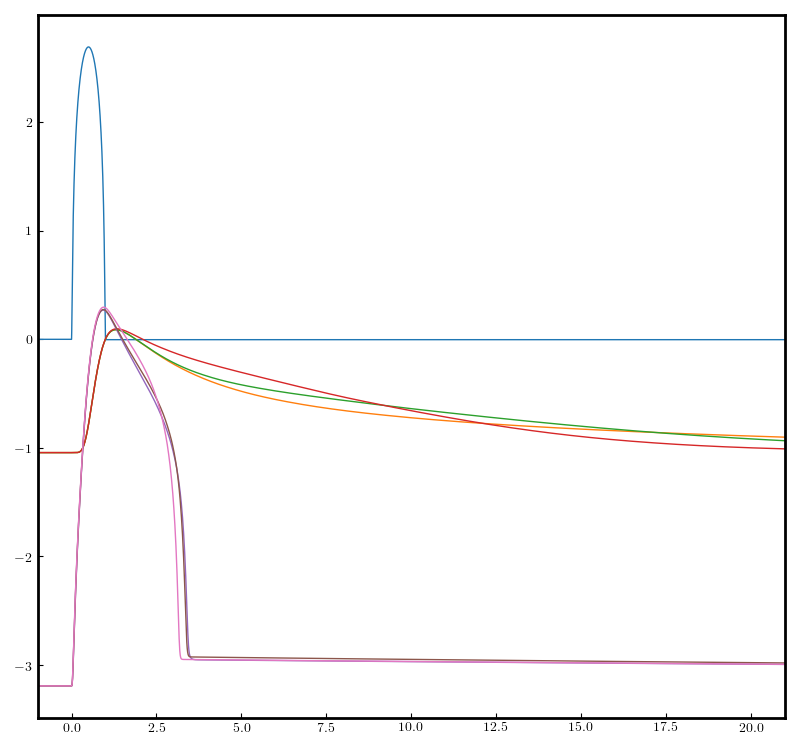

(-1, 21)

In [193]:
plt.figure(20)
dataaa = np.loadtxt('fig1M140.dat')
for i in range(1,5):
    plt.plot(dataaa[:,0],dataaa[:,i])
dataaa2 = np.loadtxt('fig1N185.dat')
for i in range(1,4):
    plt.plot(dataaa2[:,0],dataaa2[:,i])
plt.xlim(-1,21)